<a href="https://colab.research.google.com/github/anandasuryaa13/Soft-Computing/blob/main/FP_KL_ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from shapely.geometry import Polygon, Point
from scipy.spatial import Voronoi, voronoi_plot_2d
from google.colab import files
import seaborn as sns
import pandas as pd

In [ ]:
# Tentukan koordinat dari sudut-sudut batas non-square boundary berdasarkan gambar yang diunggah
x1, y1 = -5.39, 222.38
x2, y2 = -5.56, -13.27
x3, y3 = 103.75, -14.48
x4, y4 = 247.64, -13.46
x5, y5 = 342.79, 34.9
x6, y6 = 342.79, 59.79
x7, y7 = 254.76, 222.5

In [ ]:
boundary = Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4), (x5, y5), (x6, y6), (x7, y7)])

In [ ]:
# Hasilkan data sintetis untuk cluster utama
n_samples = 60000
n_main_clusters = 8  # Jumlah cluster utama
n_subclusters = 5  # Jumlah subcluster dalam setiap cluster utama
random_state = 42

In [ ]:
# Upload the CSV files
uploaded = files.upload()

Saving main_labels.csv to main_labels.csv
Saving subclusters_centroid.csv to subclusters_centroid.csv
Saving subclusters_centroid_main_labels.csv to subclusters_centroid_main_labels.csv
Saving subclusters_centroid_sub_labels.csv to subclusters_centroid_sub_labels.csv
Saving subclusters_label.csv to subclusters_label.csv
Saving subclusters_points.csv to subclusters_points.csv


In [ ]:
# Load DataFrames from the uploaded CSV files
df_subclusters_centroid = pd.read_csv('subclusters_centroid.csv')
df_subclusters_label = pd.read_csv('subclusters_label.csv')
df_subclusters_points = pd.read_csv('subclusters_points.csv')
df_subclusters_centroid_sub_labels = pd.read_csv('subclusters_centroid_sub_labels.csv')
df_subclusters_centroid_main_labels = pd.read_csv('subclusters_centroid_main_labels.csv')
df_main_labels = pd.read_csv('main_labels.csv')

In [ ]:
# Convert DataFrames back to arrays/lists
subclusters_centroid = df_subclusters_centroid.values
subclusters_label = df_subclusters_label.values.flatten()
subclusters_points = df_subclusters_points.values
subclusters_centroid_sub_labels = df_subclusters_centroid_sub_labels.values.flatten()
subclusters_centroid_main_labels = df_subclusters_centroid_main_labels.values.flatten()
main_labels = df_main_labels.values.flatten()

<ipython-input-9-5fc8578acb23>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')
<ipython-input-9-5fc8578acb23>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subcluster_points[:, 0], subcluster_points[:, 1],


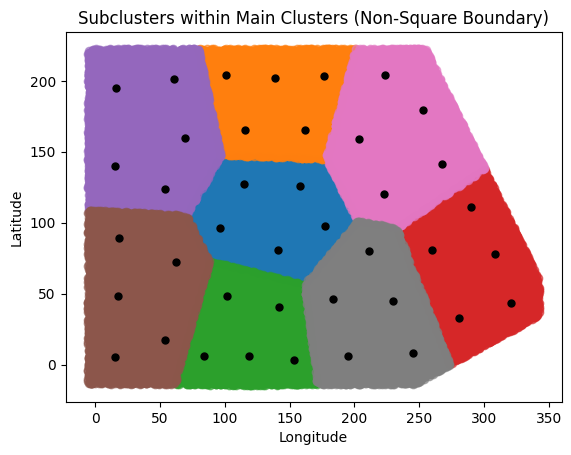

In [ ]:
# Define a color map for main clusters
cmap = plt.cm.get_cmap('tab10')

# Plot each main cluster with subclusters
unique_main_labels = np.unique(main_labels)
for i, label in enumerate(unique_main_labels):
    cluster_points = subclusters_points[main_labels == label]
    subcluster_labels = subclusters_label[main_labels == label]
    unique_sub_labels = np.unique(subcluster_labels)
    for j, sub_label in enumerate(unique_sub_labels):
        subcluster_points = cluster_points[subcluster_labels == sub_label]
        plt.scatter(subcluster_points[:, 0], subcluster_points[:, 1],
                    label=f"Main {label} Sub {sub_label}", c=cmap(label), alpha=0.6)

# Plot subcluster centroids
plt.scatter(subclusters_centroid[:, 0], subclusters_centroid[:, 1],
            marker='.', s=100, c='black', label='Subcluster Centroid')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Subclusters within Main Clusters (Non-Square Boundary)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Use seaborn for better styling
sns.set(style="whitegrid")

# Create a color palette for the main clusters
palette = sns.color_palette("tab10", n_main_clusters)

# Plot each main cluster with subclusters
plt.figure(figsize=(14, 10))
unique_main_labels = np.unique(main_labels)
for i, label in enumerate(unique_main_labels):
    cluster_points = subclusters_points[main_labels == label]
    subcluster_labels = subclusters_label[main_labels == label]
    unique_sub_labels = np.unique(subcluster_labels)
    for j, sub_label in enumerate(unique_sub_labels):
        subcluster_points = cluster_points[subcluster_labels == sub_label]
        plt.scatter(subcluster_points[:, 0], subcluster_points[:, 1],
                    label=f"Main {label} Sub {sub_label}", c=[palette[label]], alpha=0.6, edgecolor='w', s=20)

# Plot subcluster centroids
plt.scatter(subclusters_centroid[:, 0], subclusters_centroid[:, 1],
            marker='*', s=150, c='black', label='Subcluster Centroid', edgecolor='w')

# Plot boundary
x, y = boundary.exterior.xy
plt.plot(x, y, color='red', linewidth=2, linestyle='--', label='Boundary')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Subclusters within Main Clusters (Non-Square Boundary)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

In [ ]:
# Create new combined cluster labels for the centroids
combined_centroid_clusters = np.copy(subclusters_centroid_main_labels)
combined_centroid_clusters[np.isin(subclusters_centroid_main_labels, [5, 4])] = 8 # Comb 1
combined_centroid_clusters[np.isin(subclusters_centroid_main_labels, [0, 1, 2])] = 9 # Comb 2
combined_centroid_clusters[np.isin(subclusters_centroid_main_labels, [6, 3, 7])] = 10 # Comb 3

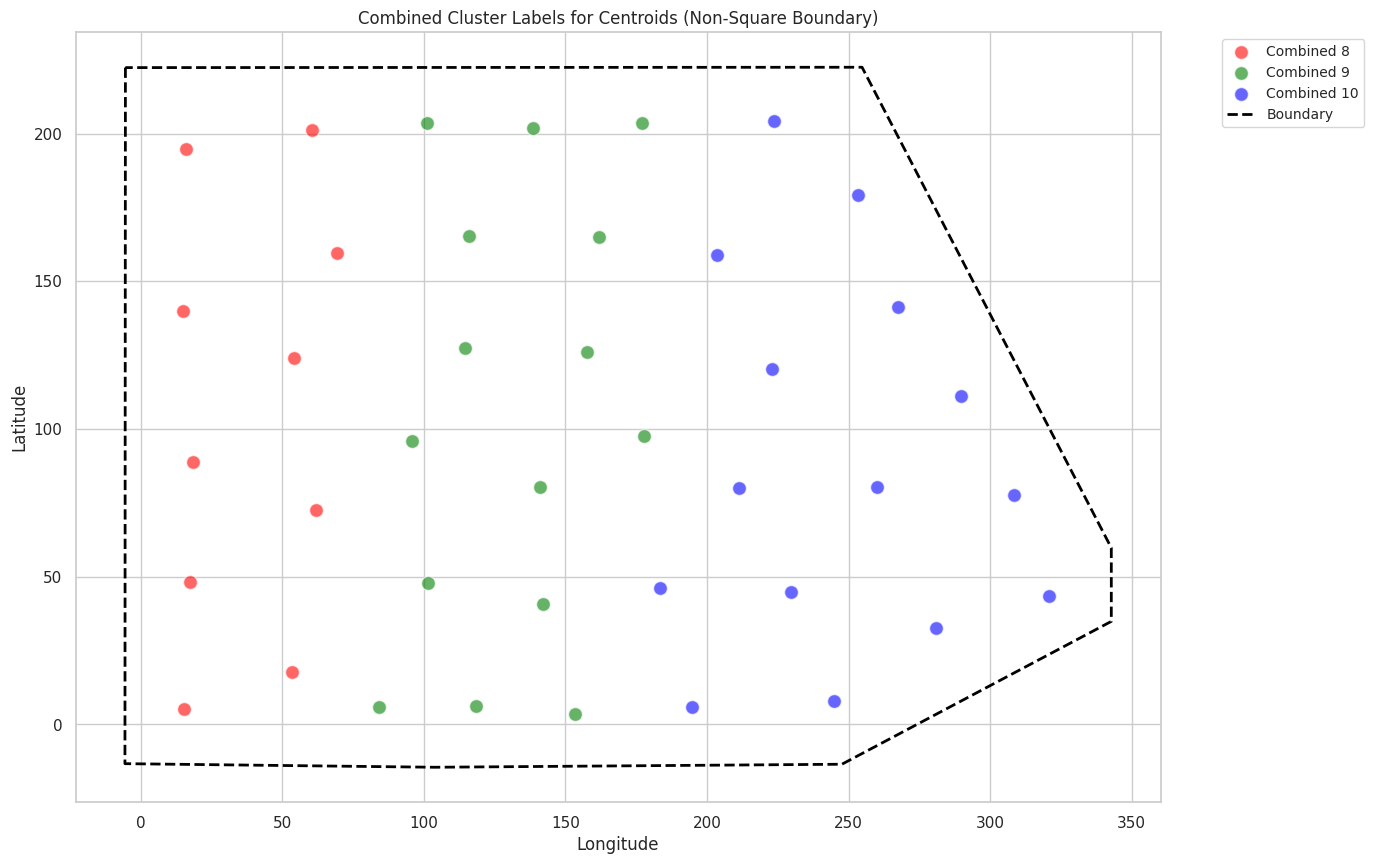

In [ ]:
# Plotting the combined clusters with specified colors
sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))

# Define custom colors for specific labels
custom_colors = {8: 'red', 9: 'green', 10: 'blue'}

# Plot each combined cluster with its specified color
unique_combined_labels = np.unique(combined_centroid_clusters)
for label in unique_combined_labels:
    cluster_points = subclusters_centroid[combined_centroid_clusters == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f"Combined {label}", c=custom_colors[label], alpha=0.6, edgecolor='w', s=100)

# Plot boundary
x, y = boundary.exterior.xy
plt.plot(x, y, color='black', linewidth=2, linestyle='--', label='Boundary')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Combined Cluster Labels for Centroids (Non-Square Boundary)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

In [ ]:
# Check dimensions to avoid IndexError
if len(combined_centroid_clusters) != len(subclusters_centroid):
    raise ValueError("The length of combined_centroid_clusters and subclusters_centroid must be the same.")

In [ ]:
class Coordinate:
    def __init__(self, x, y, node):
        self.x = x
        self.y = y
        self.node = node

    @staticmethod
    def get_total_distance(coords, exclude_end_points=True):
        total_distance = 0
        for i in range(len(coords) - 1):
            total_distance += np.sqrt((coords[i].x - coords[i + 1].x)**2 + (coords[i].y - coords[i + 1].y)**2)
        if not exclude_end_points:
            total_distance += np.sqrt((coords[0].x - coords[-1].x)**2 + (coords[0].y - coords[-1].y)**2)
        return total_distance

    @staticmethod
    def get_total_rotation(coords):
        total_rotation = 0
        for i in range(len(coords) - 1):
            angle_deg = np.arctan2(coords[i + 1].y - coords[i].y, coords[i + 1].x - coords[i].x) * 180 / np.pi
            total_rotation += abs(angle_deg)
        return total_rotation

    @staticmethod
    def get_total_cost(coords, distance_weight=0.6, rotation_weight=0.4):
        total_distance = Coordinate.get_total_distance(coords)
        total_rotation = Coordinate.get_total_rotation(coords)
        total_cost = (total_distance / 4 * distance_weight) + (total_rotation / 50 * rotation_weight)
        return total_cost, total_distance, total_rotation

In [ ]:
# ACO Algorithm
def ant_colony_optimization(coords, n_ants=50, n_iterations=300, alpha=1.0, beta=5.0, evaporation_rate=0.5, q=100):
    n_nodes = len(coords)
    pheromones = np.ones((n_nodes, n_nodes))
    best_distance = float('inf')
    best_path = None

    for _ in range(n_iterations):
        all_paths = []
        all_distances = []

        for _ in range(n_ants):
            path = [np.random.randint(0, n_nodes)]
            while len(path) < n_nodes:
                current_node = path[-1]
                probabilities = []
                for next_node in range(n_nodes):
                    if next_node not in path:
                        pheromone = pheromones[current_node][next_node] ** alpha
                        distance = 1.0 / np.sqrt((coords[current_node].x - coords[next_node].x)**2 + (coords[current_node].y - coords[next_node].y)**2)
                        attractiveness = distance ** beta
                        probabilities.append(pheromone * attractiveness)
                    else:
                        probabilities.append(0)
                probabilities = np.array(probabilities)
                probabilities /= probabilities.sum()
                next_node = np.random.choice(range(n_nodes), p=probabilities)
                path.append(next_node)

            distance = Coordinate.get_total_distance([coords[i] for i in path])
            all_paths.append(path)
            all_distances.append(distance)

            if distance < best_distance:
                best_distance = distance
                best_path = path

        # Update pheromones
        pheromones *= (1 - evaporation_rate)
        for path, distance in zip(all_paths, all_distances):
            for i in range(n_nodes - 1):
                pheromones[path[i]][path[i + 1]] += q / distance
            pheromones[path[-1]][path[0]] += q / distance

    return [coords[i] for i in best_path]

In [ ]:
def find_closest_point(point, points):
    closest_dist = float('inf')
    closest_index = -1
    for i, p in enumerate(points):
        dist = np.sqrt((point.x - p.x)**2 + (point.y - p.y)**2)
        if dist < closest_dist:
            closest_dist = dist
            closest_index = i
    return points[closest_index], closest_index

In [ ]:
def ensure_continuity(part1, part2):
    end_point = part1[-1]
    # Define the find_closest_point function here or import it if it's in another module
    def find_closest_point(point, points):
        # Calculate distances to all points in 'points'
        distances = [np.sqrt((point.x - p.x)**2 + (point.y - p.y)**2) for p in points]
        # Find the index of the closest point
        closest_index = np.argmin(distances)
        return points[closest_index], closest_index

    start_point, closest_index = find_closest_point(end_point, part2)
    if closest_index != 0:
        part2[0], part2[closest_index] = part2[closest_index], part2[0]
    return part1, part2

In [ ]:
def plot_coords(ax, coords, title, final=False):
    if coords:
        for first, second in zip(coords[:-1], coords[1:]):
            ax.plot([first.x, second.x], [first.y, second.y], 'b')
        if not final:
            ax.plot([coords[0].x, coords[-1].x], [coords[0].y, coords[-1].y], 'b')
        for c in coords:
            ax.plot(c.x, c.y, 'ro')
            ax.annotate(c.node, (c.x, c.y), textcoords="offset points", xytext=(0, 10), ha='center')
    total_distance = Coordinate.get_total_distance(coords, exclude_end_points=True)
    ax.set_title(f'{title} Total Distance: {total_distance:.2f} km')

In [ ]:
def set_start_end_nodes(coords, start_node, end_node):
    start_index = next(i for i, coord in enumerate(coords) if coord.node == start_node)
    end_index = next(i for i, coord in enumerate(coords) if coord.node == end_node)
    coords[0], coords[start_index] = coords[start_index], coords[0]
    coords[-1], coords[end_index] = coords[end_index], coords[-1]
    return coords

In [ ]:
def highlight_nodes(ax, coords):
    # Highlight start point
    ax.plot(coords[0].x, coords[0].y, 'go', markersize=10, label='Start Point', markeredgecolor='black')
    # Highlight end point
    ax.plot(coords[-1].x, coords[-1].y, 'bs', markersize=10, label='End Point', markeredgecolor='black')

Total Cost: 474.10
Total Distance: 2978.29 km
Total Rotation: 3419.24 degrees


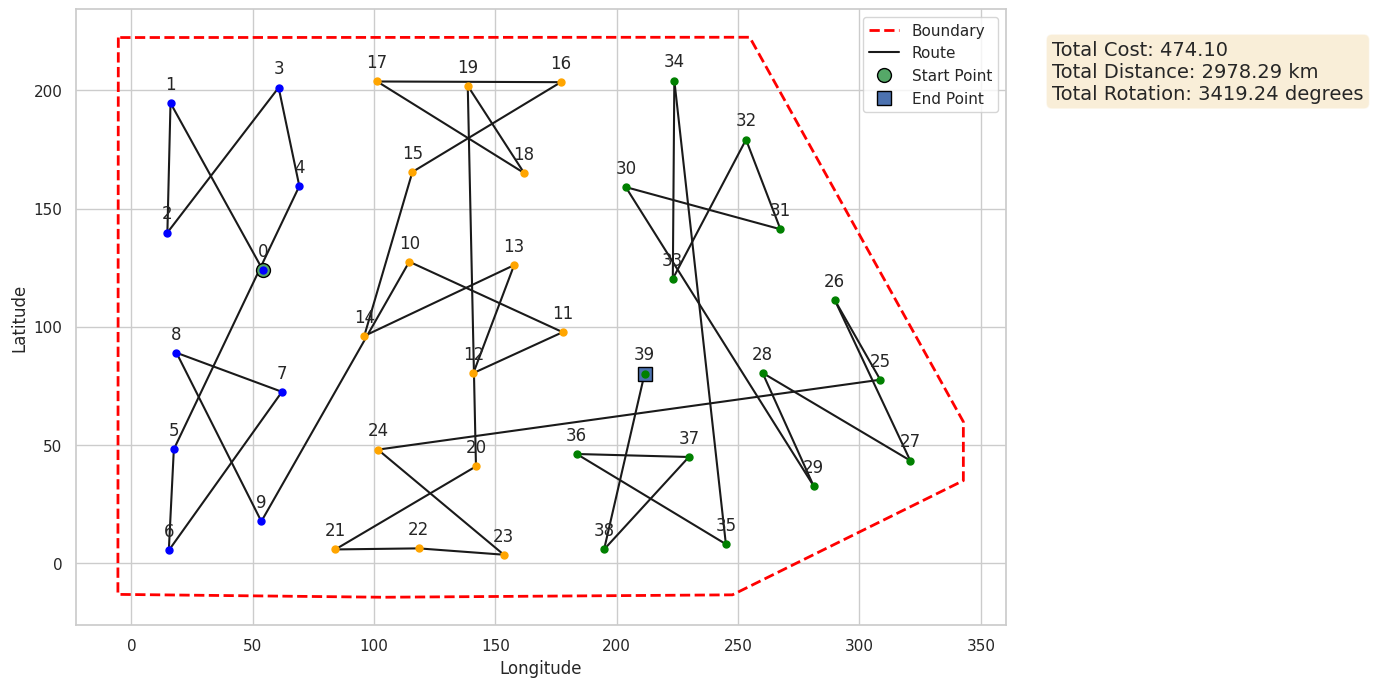

In [ ]:
if __name__ == '__main__':
    # Assuming subclusters_centroid and combined_centroid_clusters are already defined
    coords_8 = [Coordinate(x, y, i) for i, (x, y) in enumerate(subclusters_centroid[combined_centroid_clusters == 8])]
    coords_9 = [Coordinate(x, y, i + len(coords_8)) for i, (x, y) in enumerate(subclusters_centroid[combined_centroid_clusters == 9])]
    coords_10 = [Coordinate(x, y, i + len(coords_8) + len(coords_9)) for i, (x, y) in enumerate(subclusters_centroid[combined_centroid_clusters == 10])]

    # Combine parts
    combined_coords = coords_8 + coords_9 + coords_10

     # Calculate total cost, distance, and rotation for the combined coordinates
    total_cost, total_distance, total_rotation = Coordinate.get_total_cost(combined_coords)

    # Print the results
    print(f"Total Cost: {total_cost:.2f}")
    print(f"Total Distance: {total_distance:.2f} km")
    print(f"Total Rotation: {total_rotation:.2f} degrees")

    # Create a color palette for the main clusters
    palette = sns.color_palette("tab10", 3)  # Adjust n_main_clusters if necessary

    # Plot the results
    fig, ax = plt.subplots(figsize=(12, 8))

    # Assuming boundary is defined
    x, y = boundary.exterior.xy
    ax.plot(x, y, color='red', linewidth=2, linestyle='--', label='Boundary')

    # Plot the final route
    for i in range(len(combined_coords) - 1):
        ax.plot([combined_coords[i].x, combined_coords[i + 1].x], [combined_coords[i].y, combined_coords[i + 1].y], 'k-', label='Route' if i == 0 else "")

    # Highlight start and end points
    highlight_nodes(ax, combined_coords)

    # Plot the points
    for i, coord in enumerate(combined_coords):
        color = 'blue' if i < len(coords_8) else 'orange' if i < len(coords_8) + len(coords_9) else 'green'
        ax.plot(coord.x, coord.y, 'o', color=color, markersize=5)
        ax.annotate(coord.node, (coord.x, coord.y), textcoords="offset points", xytext=(0, 10), ha='center')

    # Add text box for cost, distance, and rotation
    textstr = '\n'.join((
        f'Total Cost: {total_cost:.2f}',
        f'Total Distance: {total_distance:.2f} km',
        f'Total Rotation: {total_rotation:.2f} degrees'))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # Add labels and legend
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()

In [ ]:
if __name__ == '__main__':
    # Assuming subclusters_centroid and combined_centroid_clusters are already defined
    coords_8 = [Coordinate(x, y, i) for i, (x, y) in enumerate(subclusters_centroid[combined_centroid_clusters == 8])]
    coords_9 = [Coordinate(x, y, i + len(coords_8)) for i, (x, y) in enumerate(subclusters_centroid[combined_centroid_clusters == 9])]
    coords_10 = [Coordinate(x, y, i + len(coords_8) + len(coords_9)) for i, (x, y) in enumerate(subclusters_centroid[combined_centroid_clusters == 10])]

    # Check if the lists are empty
    if not coords_8:
        print("coords_8 is empty")
    if not coords_9:
        print("coords_9 is empty")
    if not coords_10:
        print("coords_10 is empty")

    # Set specific nodes as start and end points
    coords_8 = set_start_end_nodes(coords_8, 1, 4)
    coords_9 = set_start_end_nodes(coords_9, 14, 16)
    coords_10 = set_start_end_nodes(coords_10, 34, 32)

    # Ensure continuity between parts
    coords_8, coords_9 = ensure_continuity(coords_8, coords_9)
    coords_9, coords_10 = ensure_continuity(coords_9, coords_10)

    # Perform ant_colony_optimization on each part
    coords_8 = ant_colony_optimization(coords_8)
    coords_9 = ant_colony_optimization(coords_9)
    coords_10 = ant_colony_optimization(coords_10)

    # Combine parts
    combined_coords = coords_8 + coords_9 + coords_10

    # Calculate total cost, distance, and rotation for the combined coordinates
    total_cost, total_distance, total_rotation = Coordinate.get_total_cost(combined_coords)

    # Print the results
    print(f"Total Cost: {total_cost:.2f}")
    print(f"Total Distance: {total_distance:.2f} km")
    print(f"Total Rotation: {total_rotation:.2f} degrees")

    # Create a color palette for the main clusters
    palette = sns.color_palette("tab10", 3)  # Adjust n_main_clusters if necessary

    # Plot the results
    fig, ax = plt.subplots(figsize=(12, 8))

    # Assuming boundary is defined
    x, y = boundary.exterior.xy
    ax.plot(x, y, color='red', linewidth=2, linestyle='--', label='Boundary')

    # Plot the final route
    for i in range(len(combined_coords) - 1):
        ax.plot([combined_coords[i].x, combined_coords[i + 1].x], [combined_coords[i].y, combined_coords[i + 1].y], 'k-', label='Route' if i == 0 else "")

    # Highlight start and end points
    highlight_nodes(ax, combined_coords)

    # Plot the points
    for i, coord in enumerate(combined_coords):
        color = 'blue' if i < len(coords_8) else 'orange' if i < len(coords_8) + len(coords_9) else 'green'
        ax.plot(coord.x, coord.y, 'o', color=color, markersize=5)
        ax.annotate(coord.node, (coord.x, coord.y), textcoords="offset points", xytext=(0, 10), ha='center')

    # Add text box for cost, distance, and rotation
    textstr = '\n'.join((
        f'Total Cost: {total_cost:.2f}',
        f'Total Distance: {total_distance:.2f} km',
        f'Total Rotation: {total_rotation:.2f} degrees'))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # Add labels and legend
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()


In [ ]:
if __name__ == '__main__':
    # Assuming subclusters_centroid and combined_centroid_clusters are already defined
    coords_8 = [Coordinate(x, y, i) for i, (x, y) in enumerate(subclusters_centroid[combined_centroid_clusters == 8])]
    coords_9 = [Coordinate(x, y, i + len(coords_8)) for i, (x, y) in enumerate(subclusters_centroid[combined_centroid_clusters == 9])]
    coords_10 = [Coordinate(x, y, i + len(coords_8) + len(coords_9)) for i, (x, y) in enumerate(subclusters_centroid[combined_centroid_clusters == 10])]

    # Check if the lists are empty
    if not coords_8:
        print("coords_8 is empty")
    if not coords_9:
        print("coords_9 is empty")
    if not coords_10:
        print("coords_10 is empty")

    # Set specific nodes as start and end points
    coords_8 = set_start_end_nodes(coords_8, 1, 3)
    coords_9 = set_start_end_nodes(coords_9, 19, 16)
    coords_10 = set_start_end_nodes(coords_10, 34, 32)

    # Ensure continuity between parts
    coords_8, coords_9 = ensure_continuity(coords_8, coords_9)
    coords_9, coords_10 = ensure_continuity(coords_9, coords_10)

    # Perform ant_colony_optimization on each part
    coords_8 = ant_colony_optimization(coords_8)
    coords_9 = ant_colony_optimization(coords_9)
    coords_10 = ant_colony_optimization(coords_10)

    # Combine parts
    combined_coords = coords_8 + coords_9 + coords_10

    # Calculate total cost, distance, and rotation for the combined coordinates
    total_cost, total_distance, total_rotation = Coordinate.get_total_cost(combined_coords)

    # Print the results
    print(f"Total Cost: {total_cost:.2f}")
    print(f"Total Distance: {total_distance:.2f} km")
    print(f"Total Rotation: {total_rotation:.2f} degrees")

    # Create a color palette for the main clusters
    palette = sns.color_palette("tab10", 3)  # Adjust n_main_clusters if necessary

    # Plot the results
    fig, ax = plt.subplots(figsize=(12, 8))

    # Assuming boundary is defined
    x, y = boundary.exterior.xy
    ax.plot(x, y, color='red', linewidth=2, linestyle='--', label='Boundary')

    # Plot the final route
    for i in range(len(combined_coords) - 1):
        ax.plot([combined_coords[i].x, combined_coords[i + 1].x], [combined_coords[i].y, combined_coords[i + 1].y], 'k-', label='Route' if i == 0 else "")

    # Highlight start and end points
    highlight_nodes(ax, combined_coords)

    # Plot the points
    for i, coord in enumerate(combined_coords):
        color = 'blue' if i < len(coords_8) else 'orange' if i < len(coords_8) + len(coords_9) else 'green'
        ax.plot(coord.x, coord.y, 'o', color=color, markersize=5)
        ax.annotate(coord.node, (coord.x, coord.y), textcoords="offset points", xytext=(0, 10), ha='center')

    # Add text box for cost, distance, and rotation
    textstr = '\n'.join((
        f'Total Cost: {total_cost:.2f}',
        f'Total Distance: {total_distance:.2f} km',
        f'Total Rotation: {total_rotation:.2f} degrees'))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # Add labels and legend
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()

    # Remove the grid
    ax.grid(False)

    plt.show()
